Dataset downloaded to: C:\Users\LENOVO\.cache\kagglehub\datasets\orvile\bone-fracture-dataset\versions\2
Using dataset root: C:\Users\LENOVO\.cache\kagglehub\datasets\orvile\bone-fracture-dataset\versions\2\Bone fracture dataset\Bone fracture dataset\Dataset
Found 1702 images belonging to 2 classes.
Found 425 images belonging to 2 classes.
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step - accuracy: 0.9289 - loss: 0.2826 - val_accuracy: 0.9412 - val_loss: 0.1764
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - accuracy: 0.9401 - loss: 0.1565 - val_accuracy: 0.9412 - val_loss: 0.1895
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - accuracy: 0.9483 - loss: 0.1404 - val_accuracy: 0.9388 - val_loss: 0.1733
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 247ms/step - accuracy: 0.9612 - loss: 0.1181 - val_accuracy: 0.9318 - val_loss: 0.1913
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.9583 - loss: 0.0968 - val_accuracy: 0.9388 - val_loss: 0.1719
Epoch 6/10
54

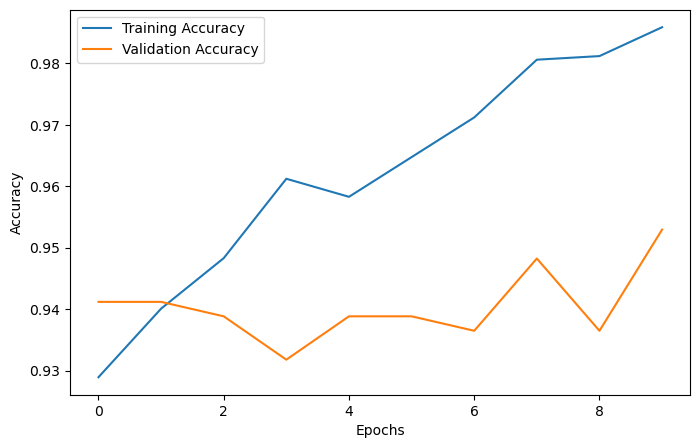

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import kagglehub
import os

# ✅ 1. Auto-download bone fracture dataset from Kaggle
dataset_path = kagglehub.dataset_download("orvile/bone-fracture-dataset")
print("Dataset downloaded to:", dataset_path)

# ✅ 2. Construct the correct dataset directory
dataset_root = os.path.join(dataset_path, "Bone fracture dataset", "Bone fracture dataset", "Dataset")
print("Using dataset root:", dataset_root)

# Image settings
img_height, img_width = 150, 150
batch_size = 32

# ✅ 3. Data loading & preprocessing (train / validation split)
datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_root,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_root,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# ✅ 4. Build CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ✅ 5. Train Model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

# ✅ 6. Evaluate Model on Validation Data (Test Accuracy)
test_loss, test_accuracy = model.evaluate(val_data)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# ✅ 7. Plot Training Results
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
